# L07 Artificial Neural Network

In [1]:
import torch

In [2]:
# data
import numpy as np

data = np.loadtxt('dataset/diabetes.csv.gz', delimiter=',', dtype=np.float32)
test_size = int(data.shape[0]*0.2)
train_data = data[:-test_size,:]
test_data = data[-test_size:,:]

x_data = torch.from_numpy(train_data[:,:-1])
y_data = torch.from_numpy(train_data[:,[-1]]) # if [:,-1], torch.Size([759])
print(y_data.size()) # torch.Size([608, 1])

torch.Size([608, 1])


In [3]:
# model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        # y_pred = torch.sigmoid(self.linear(x))
        y_pred = self.sigmoid(self.linear1(x))
        y_pred = self.sigmoid(self.linear2(y_pred))
        y_pred = self.sigmoid(self.linear3(y_pred))
        return y_pred
    
neuralNetwork = NeuralNetwork()

In [4]:
# loss
criterion = torch.nn.BCELoss()

In [26]:
# optimizer
optimizer = torch.optim.SGD(neuralNetwork.parameters(), lr=0.15)

In [27]:
# train
epoch = 0
train_loss = []

# for epoch in  range(100):
while True:
    y_pred = neuralNetwork(x_data)
    loss = criterion(y_pred, y_data)
    train_loss.append(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if(loss.item() <= 1e-5 or epoch >= 200000):
        break
    else:
        epoch += 1

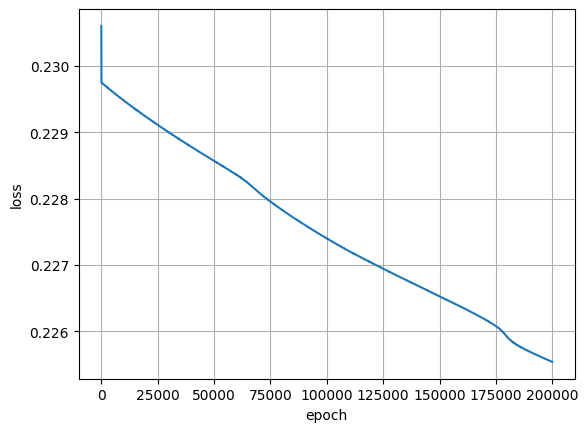

In [28]:
# train_plot
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.show()

In [29]:
# test
x_test = torch.from_numpy(test_data[:,:-1])
y_test_truth = torch.from_numpy(test_data[:,[-1]])

y_test_pred = neuralNetwork(x_test)
y_test_pred = np.where(y_test_pred > 0.5, 1, 0) 
accurate_rate = (y_test_pred == y_test_truth.tolist()).sum() / test_size
# y_test_pred = y_test_pred.round()
# accurate_rate = (y_test_pred == y_test_truth).sum() / test_size
print('accurate_rate=', accurate_rate)

accurate_rate= 0.7483443708609272
